<img src="./logo_UTN.svg" align="right" width="150" /> 

### Procesamiento Digital de Señales

## Trabajo Práctico Nº5 - "Primeras nociones de estimación espectral"

### Gabriel Cruz

## Enunciado

Para una señal:

\begin{equation}
x(k)=a1⋅sen(Ω1⋅k)+n(k)
\end{equation}

siendo:

\begin{equation}
Ω1=Ω0+fr⋅2π/N
\end{equation}

\begin{equation}
Ω0=π/2
\end{equation}

y las variables aleatorias definidas por
\begin{equation}
fr∼U(−1/2,1/2)
\end{equation}

\begin{equation}
n∼N(0,σ2)
\end{equation}

Evalúe los siguientes estimadores de a1 y Ω1

\begin{equation}
\hat{a}=|X(Ω)|=|F{x(k)}|
\end{equation}

\begin{equation}
\hat{Ω}=arg maxΩ{|X(Ω)|}
\end{equation}

Siguiendo las siguientes consignas:

Considere 200 realizaciones de 1000 muestras para cada experimento.
Parametrice para SNR's de 3 y 10 db.


### 1) Se pide que grafique los histogramas de cada estimador para cada SNR, de ser posible de forma conjunta, o en la misma escala en caso que no lo sea.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#%% Generador de señales senoidales

def     mi_funcion_sen(vmax = 1, dc = 0, ff = 1, ph = 0, nn = 1000, fs = 1000):
    
    w = 2 * np.pi * ff
    tt = np.arange(0, nn/fs, 1/fs)
    xx = dc + vmax * np.sin(tt * w + ph )
    return tt,xx
    
#%% Datos generales de la simulación

fs = 1000.0 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras
 
# cantidad de veces más densa que se supone la grilla temporal para tiempo "continuo"
over_sampling = 4
N_os = N*over_sampling
 
# Datos del ADC
B = 4 # bits
Vf = 2 # Volts
q = Vf/(2**(B-1)) # Volts
 
# datos del ruido
kn = 1/10  # 10 dB
pot_ruido = (q**2)/12 * kn # Watts (potencia de la señal 1 W)

# datos del ruido
kn2 = 1/2   # 3 dB
pot_ruido2 = (q**2)/12 * kn2 # Watts (potencia de la señal 1 W)
 
ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral
fo = N/4
vmax = np.sqrt(2)  #Amplitud de la senoidal
R= 200 #realizaciones

<Figure size 640x480 with 0 Axes>

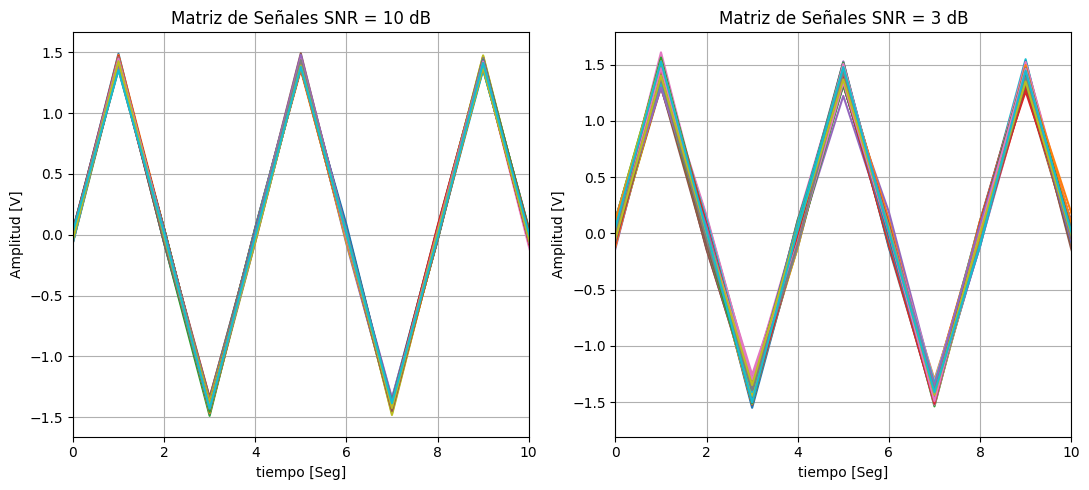

In [2]:
#%% Creacion de 200 senoidales + ruido

"""
SNR = 10 dB
"""

#Creo una matrix con todos ceros
matrix = np.zeros((N,R))

#Realizo la carga en la matriz
for i in range(R):
#Genero una senoidal
    tt, analog_sig = mi_funcion_sen(vmax=vmax, ff=fo, nn=N, fs=fs)
    n = np.random.normal(0,np.sqrt(pot_ruido),N)
    matrix[:,i]= analog_sig + n
    
"""
SNR = 3 dB
"""

#Creo una matrix con todos ceros
matrix2 = np.zeros((N,R))

#Realizo la carga en la matriz
for i in range(R):
#Genero una senoidal
    tt, analog_sig2 = mi_funcion_sen(vmax=vmax, ff=fo, nn=N, fs=fs)
    n = np.random.normal(0,np.sqrt(pot_ruido2),N)
    matrix2[:,i]= analog_sig2 + n
    
plt.figure(1)

# Define el tamaño de la figura (ancho, alto) en pulgadas
plt.figure(figsize=(11, 5))  # Ajusta estos valores según lo que necesites

plt.subplot(121)
plt.plot(matrix)
plt.title('Matriz de Señales SNR = 10 dB')
plt.xlabel('tiempo [Seg]')
plt.ylabel('Amplitud [V]')
plt.xlim(0,10)
plt.grid()
plt.subplot(122)
plt.plot(matrix2)
plt.title('Matriz de Señales SNR = 3 dB')
plt.xlabel('tiempo [Seg]')
plt.ylabel('Amplitud [V]')
plt.xlim(0,10)
plt.grid()

plt.tight_layout()  # Ajusta el espaciado entre subgráficas
plt.show()

En los graficos de arriba se puede observar las 200 senoidales con ruido, tanto para SNR = 10 dB como para SNR = 3 dB. 

<Figure size 640x480 with 0 Axes>

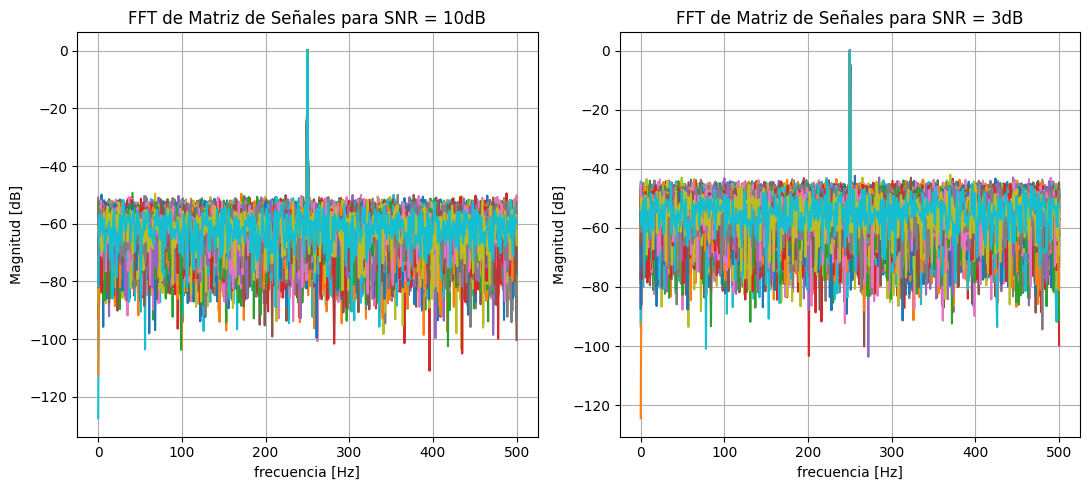

In [3]:
#%% Obtencion de FFT

#Filtrado de frecuencia Nyquist
ff = np.arange(0,fs,df)
bfrec = ff <= fs/2 

"""
Realizo la FFT a todas las señales
axis = 0, Indico que la FFT se realice a lo largo de las columnas. 
O sea, en cada señal.
Divido por N para normalizar la amplitud de la FFT
"""
ft_matrix = np.fft.fft(matrix,axis =0)/N 

"""
SNR = 3dB
"""
ft_matrix2 = np.fft.fft(matrix2,axis =0)/N 

plt.figure(2)
# Define el tamaño de la figura (ancho, alto) en pulgadas
plt.figure(figsize=(11, 5))  # Ajusta estos valores según lo que necesites
plt.subplot(121)
plt.plot(ff[bfrec], 10* np.log10(2 * np.abs(ft_matrix[bfrec])**2))
plt.title('FFT de Matriz de Señales para SNR = 10dB')
plt.xlabel('frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.grid()
plt.subplot(122)
plt.plot(ff[bfrec], 10* np.log10(2 * np.abs(ft_matrix2[bfrec])**2))
plt.title('FFT de Matriz de Señales para SNR = 3dB')
plt.xlabel('frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.grid()
plt.tight_layout()  # Ajusta el espaciado entre subgráficas
plt.show()

En las graficas de arriba podemos observar las FFTs de las 200 senoidales, se puede observar que tienen una componente de frecuencia en 250Hz, que es la frecuencia a la cual se configuro las senoidales N/4.

<Figure size 640x480 with 0 Axes>

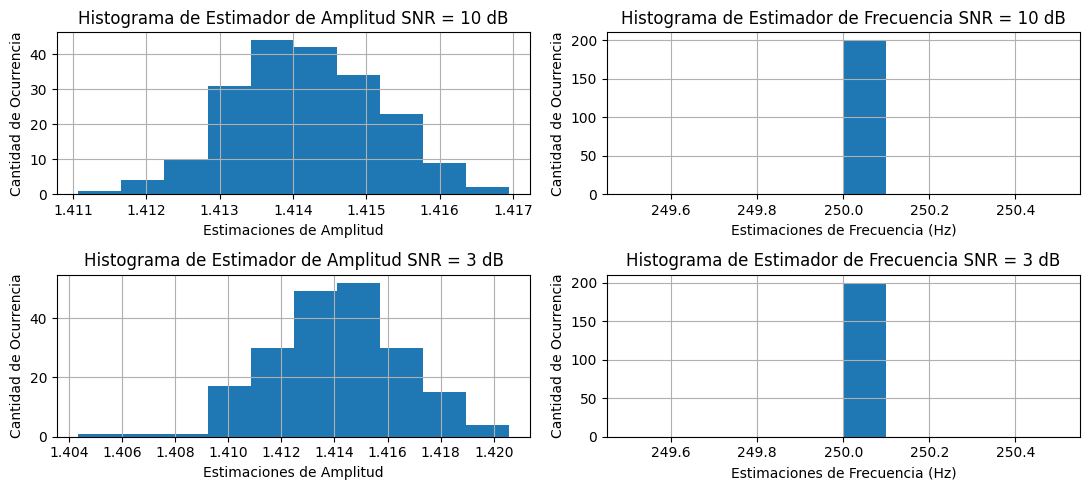

Estimador de Amplitud para SNR = 10 dB(vp_est): 1.41416200007714
Estimador de Frecuencia para SNR = 10 dB (f_est): 250.0
Estimador de Amplitud para SNR = 3 dB(vp_est2): 1.4140567650828073
Estimador de Frecuencia para SNR = 3 dB (f_est2): 250.0


In [4]:
#%% Estimadores
"""
Índice de máxima amplitud
Obtengo el modulo de la FFT limitndo las frecuencias que estan por debajo
de la frecuncia de Nyquist.
axis = 0, Indico que realice a lo largo de las columnas. 
np.argmax: Encuentra el indice de maxima amplitud para cada realizacion (Columna)
de la FFT. O sea, indica en que frecuencia se encuentra la maxima amplitud de la señal.
"""
indice_maxamp = np.argmax(np.abs(ft_matrix[bfrec, :]), axis=0)

"""
 SNR = 3 dB
"""
indice_maxamp2 = np.argmax(np.abs(ft_matrix2[bfrec, :]), axis=0)

"""
Estimador de Amplitud 
Obtengo la magnitud de la FFT en el indice de maxima amplitud obtenida 
anteriormente.
Multiplico por 2 porque me entrega la mitad amplitud original por la parte positiva
y negativa del espectro.

a0: Obtiene las estimaciones de amplitud para cada una de las 200 repeticiones.
"""
a0 = 2 * np.abs(ft_matrix[indice_maxamp, np.arange(R)])

"""
SNR = 3dB
"""
a02 = 2 * np.abs(ft_matrix2[indice_maxamp2, np.arange(R)])


"""
Estimador de Amplitud Promedio
Calcula el valor promedio de a0 (Estimador de amplitud)
"""
vp_est = np.mean(a0)

"""
SNR = 3 dB
"""
vp_est2 = np.mean(a02)


"""
Estimador de Frecuencia
Multiplica los indices maximos por la resolucion espectral para
obtener las frecuencias estimadas.
"""
f_est = indice_maxamp * fs / N

f_est_mean = np.mean(indice_maxamp)* fs/N
"""
SNR = 3 dB
"""

f_est2 = indice_maxamp2 * fs / N

f_est2_mean = np.mean(indice_maxamp2)* fs/N

plt.figure(3)
# Define el tamaño de la figura (ancho, alto) en pulgadas
plt.figure(figsize=(11, 5))  # Ajusta estos valores según lo que necesites
plt.subplot(221)
plt.hist(a0, bins=10, alpha=1)
plt.title("Histograma de Estimador de Amplitud SNR = 10 dB")
plt.xlabel('Estimaciones de Amplitud')
plt.ylabel('Cantidad de Ocurrencia')
plt.grid()
plt.subplot(222)
plt.hist(f_est, bins=10, alpha=1)
plt.title("Histograma de Estimador de Frecuencia SNR = 10 dB")
plt.xlabel('Estimaciones de Frecuencia (Hz)')
plt.ylabel('Cantidad de Ocurrencia')
plt.grid()
plt.subplot(223)
plt.hist(a02, bins=10, alpha=1)
plt.title("Histograma de Estimador de Amplitud SNR = 3 dB")
plt.xlabel('Estimaciones de Amplitud')
plt.ylabel('Cantidad de Ocurrencia')
plt.grid()
plt.subplot(224)
plt.hist(f_est2, bins=10, alpha=1)
plt.title("Histograma de Estimador de Frecuencia SNR = 3 dB")
plt.xlabel('Estimaciones de Frecuencia (Hz)')
plt.ylabel('Cantidad de Ocurrencia')
plt.grid()
plt.tight_layout()  # Ajusta el espaciado entre subgráficas
plt.show()

# Mostrar resultados
print(f'Estimador de Amplitud para SNR = 10 dB(vp_est): {vp_est}')
print(f'Estimador de Frecuencia para SNR = 10 dB (f_est): {f_est_mean}')
print(f'Estimador de Amplitud para SNR = 3 dB(vp_est2): {vp_est2}')
print(f'Estimador de Frecuencia para SNR = 3 dB (f_est2): {f_est2_mean}')

En los histrogramas de arriba podemos observar el estimador de Amplitud para SNR = 10dB como para SNR = 3 dB, tienen una distribucion Normal con una media de 1.414, esto coincide con la amplitud de las senoidales que tenian una amplitud de sqrt(2) y para el estimador de frecuencia podemos observar que tiene una estimacion de frecuencia de 250 HZ y coincide con la frecuencia de la señales que era igual a fo = N/4 = 250Hz.

## Conclusion:

Se puede concluir que los estimadores realizados fueron bastantes precisos. Esto puede deberse a que las señales analizadas eran senoidales con poco ruido. Sin embargo, al trabajar con señales mas ruidosa o desconocida, pueden surgir nuevas concluciones sobre la precision de los estimadores. Pero como primer paso a la realizacion de un estimador espectral se puede decir que los estimadores espectrales son una herramienta poderosa para estimar la amplitud y frecuencia de una señal desconocida.